<a id='content'></a>
# Содержание
- [Загрузка библиотек](#include_libs)
- [Открытие CSV файла с базой данных](#df_open)
- [Задание 1.1](#task_1_1)
- [Задание 1.2](#task_1_2)
- [Задание 1.3](#task_1_3)
- [Черновик](#drft)


[Вернуться в начало](#content)
<a id='include_libs'></a>

In [1]:
!pip install plotly > None

In [2]:
!pip install pandas > None

In [3]:
!pip install typer > None

In [4]:
!pip install Path > None

In [5]:
!pip install numpy > None

In [6]:
!pip install matplotlib >None

In [7]:
!pip install seaborn > None

In [8]:
!pip install scikit-learn >None

In [9]:
# !pip install -U scikit-learn > None

In [10]:
import warnings
warnings.filterwarnings('ignore')

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import typer
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default='notebook'

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV 
from sklearn import datasets 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve, f1_score, fbeta_score, confusion_matrix, precision_score, recall_score, accuracy_score, mean_squared_error,confusion_matrix, r2_score, median_absolute_error, classification_report 
from sklearn.dummy import DummyRegressor, DummyClassifier
import itertools
from sklearn.neighbors import KNeighborsClassifier

[Вернуться в начало](#content)
<a id='df_open'></a>

Для начала используя Pandas загрузим данные в DataFrame:

In [11]:
path = Path.cwd()
files = []
for ext in ['*.csv']:
    files += [p for p in Path(path).glob(ext) if p.is_file()]
    
data = pd.read_csv(files[0], delimiter=',')
df = pd.DataFrame(data)

df = df.drop(columns='A_id')

num_cols = df.select_dtypes(exclude='object')

df.head()

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness   Acidity  \
0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840 -0.491590   
1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530 -0.722809   
2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033  2.621636   
3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761  0.790723   
4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849  0.501984   

  Quality  
0    good  
1    good  
2     bad  
3    good  
4    good

<a id='task_1_1'></a>
[Вернуться в начало](#content)
# Задание 1.1
**Выбрать и обосновать метрику для измерения качества**

Комментарий: В рамках данного пункта необходимо подобрать наиболее релевантную метрику или набор метрик для вашей задачи, написав краткое обоснование (1-2 предложения). 

Критерии оценки:

- Предложена метрика - 5 баллов <font color='green'>(status)</font>.
- Присутствует корректное обоснование - 5 баллов <font color='green'>(status)</font>.

###### Ответ:

База данных содерчит данные о яблоках, их характеристиках и соответствующее им качество. Предполагается рассмотрение задачи бинарной классификации, чтобы по параметрам яблока определить его качество. В качестве метрики необходимо отслеживать Recall, потому что надо делать сортировку яблок, выделить из них хорошие и узнать сколько процентов яблок из них реально хороших.

[Вернуться в начало](#content)
<a id='task_1_2'></a>
# Задание 1.2

**Провести EDA на своих данных**

Комментарий: В рамках данного пункта необходимо провести предварительный разведочный анализ своего набора данных.

Критерии оценки:

- Рассмотрены базовые характеристики/статистики для набора данных - 2 балла <font color='green'>(status)</font>.
- Реализованы наиболее релевантные визуализации - 4 балла <font color='green'>(status)</font>.
- По ходу работы присутствуют комментарии (вы, как эксперт в предметной области, можете проинтерпретировать полученные результаты анализа, сделав выводы о том, каким образом лучше работать с набором данных в будущем, какие могут возникнуть проблемы, какую предобработку целесообразно сделать и тп) - 4 балла <font color='green'>(status)</font>.
- Продемонстрировать использование библиотеки plotly для визуализации <font color='green'>(status)</font>.

При работе с БД необходимо аккуратно с ними работать и проверять их состояние перед непосредственным МО. Например, есть такая проблема - пропущенные данные, вставленные в набор, выглядят как строка с записью “Not Available”. Это означает, что Python, даже если эта колонка содержит в себе преимущественно числовые признаки, будет интерпретировать её как тип данных object, потому что Pandas интерпретируют любой признак содержащий строковые значения как строку. Посмотреть на то, какой тип данных имеет тот или иной признак, можно следующим образом:

In [12]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

Наша БД имеет 7 числовых признака и 1 категоричный. В данных отсутствуют пустые клетки, из-за чего нет необходимости происзводить дополнительную фильтрацию\предобработку данных.

Приведем стандартную таблицу статистических данных по каждому признаку.

In [13]:
num_cols.describe()

Size       Weight    Sweetness  Crunchiness    Juiciness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean     -0.503015    -0.989547    -0.470479     0.985478     0.512118   
std       1.928059     1.602507     1.943441     1.402757     1.930286   
min      -7.151703    -7.149848    -6.894485    -6.055058    -5.961897   
25%      -1.816765    -2.011770    -1.738425     0.062764    -0.801286   
50%      -0.513703    -0.984736    -0.504758     0.998249     0.534219   
75%       0.805526     0.030976     0.801922     1.894234     1.835976   
max       6.406367     5.790714     6.374916     7.619852     7.364403   

          Ripeness      Acidity  
count  4000.000000  4000.000000  
mean      0.498277     0.076877  
std       1.874427     2.110270  
min      -5.864599    -7.010538  
25%      -0.771677    -1.377424  
50%       0.503445     0.022609  
75%       1.766212     1.510493  
max       7.237837     7.404736

Предварительный анализ данных (Exploratory Data Analysis — EDA). На этом этапе строятся графики, изучаются закономерности, аномалии или связи между признаками.

Цель этого этапа понять, что эти данные могут дать. Обычно процесс начинается с обзора всего набора, затем переходит к его специфическим подмножествам. Любые находки могут быть по-своему интересны, также они могут дать ценные подсказки, например, по поводу относительной значимости различных признаков.

Для начала построим гистограммы для всех численных переменных с matplotlib, при этом разделим гистограммы по кризнаку Quality (good or bad).

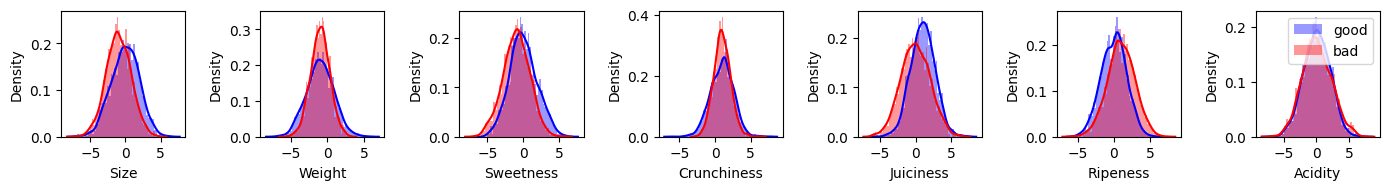

In [14]:
row, col = num_cols.shape
fig, axes = plt.subplots(1, col, figsize=(2 * col, 2))

for idx, feature in enumerate(num_cols.columns):
    for Qua in df['Quality'].unique():
        I = df['Quality'] == Qua
        sns.distplot(df[feature][I], bins=50, color='b' if Qua == 'good' else 'r', ax=axes[idx], label=Qua)

plt.legend()
plt.tight_layout()
plt.show()

Все параметры имеют колоколообразную форму гистограммы (нормальное распределение). Такое распределение может быть описано количественно параметрами положение максимума (медиана), ширина разброса и плотность в максимуме. Стоит отметить несколько особенностей:
- Медиана совпадает в случае Weight, Crunchiness and Acidity. В остальных случаях хорошие и плохие яблоки имеют разные значения медиан для неназванных признаков. Из-за разных медиан появляется предположение применение данного признака для определения качества яблока по измерению параметра. Например, хорошее яблоко по весу преимущественно больше, сочнее и слаще, но менее зрелое.
- Максимумы плотности существенно отличаются в случаях Weight, Crunchiness and Juiciness, Size. Из-за этого расбросы у них также отличаются существенно. Например, расброс у хороших яблок по весу больше, хотя медианы совпадают
- Гистограммы для хороших и плохих яблок по признаку Acidity практически совпадает от куда следует, по этому признаку не определить качества яблока.



Для многостороннего взгляда на данные, далее представлены блочные диаграммы с ограничителями выбросов для компактного изображения одномерного распределения вероятностей.

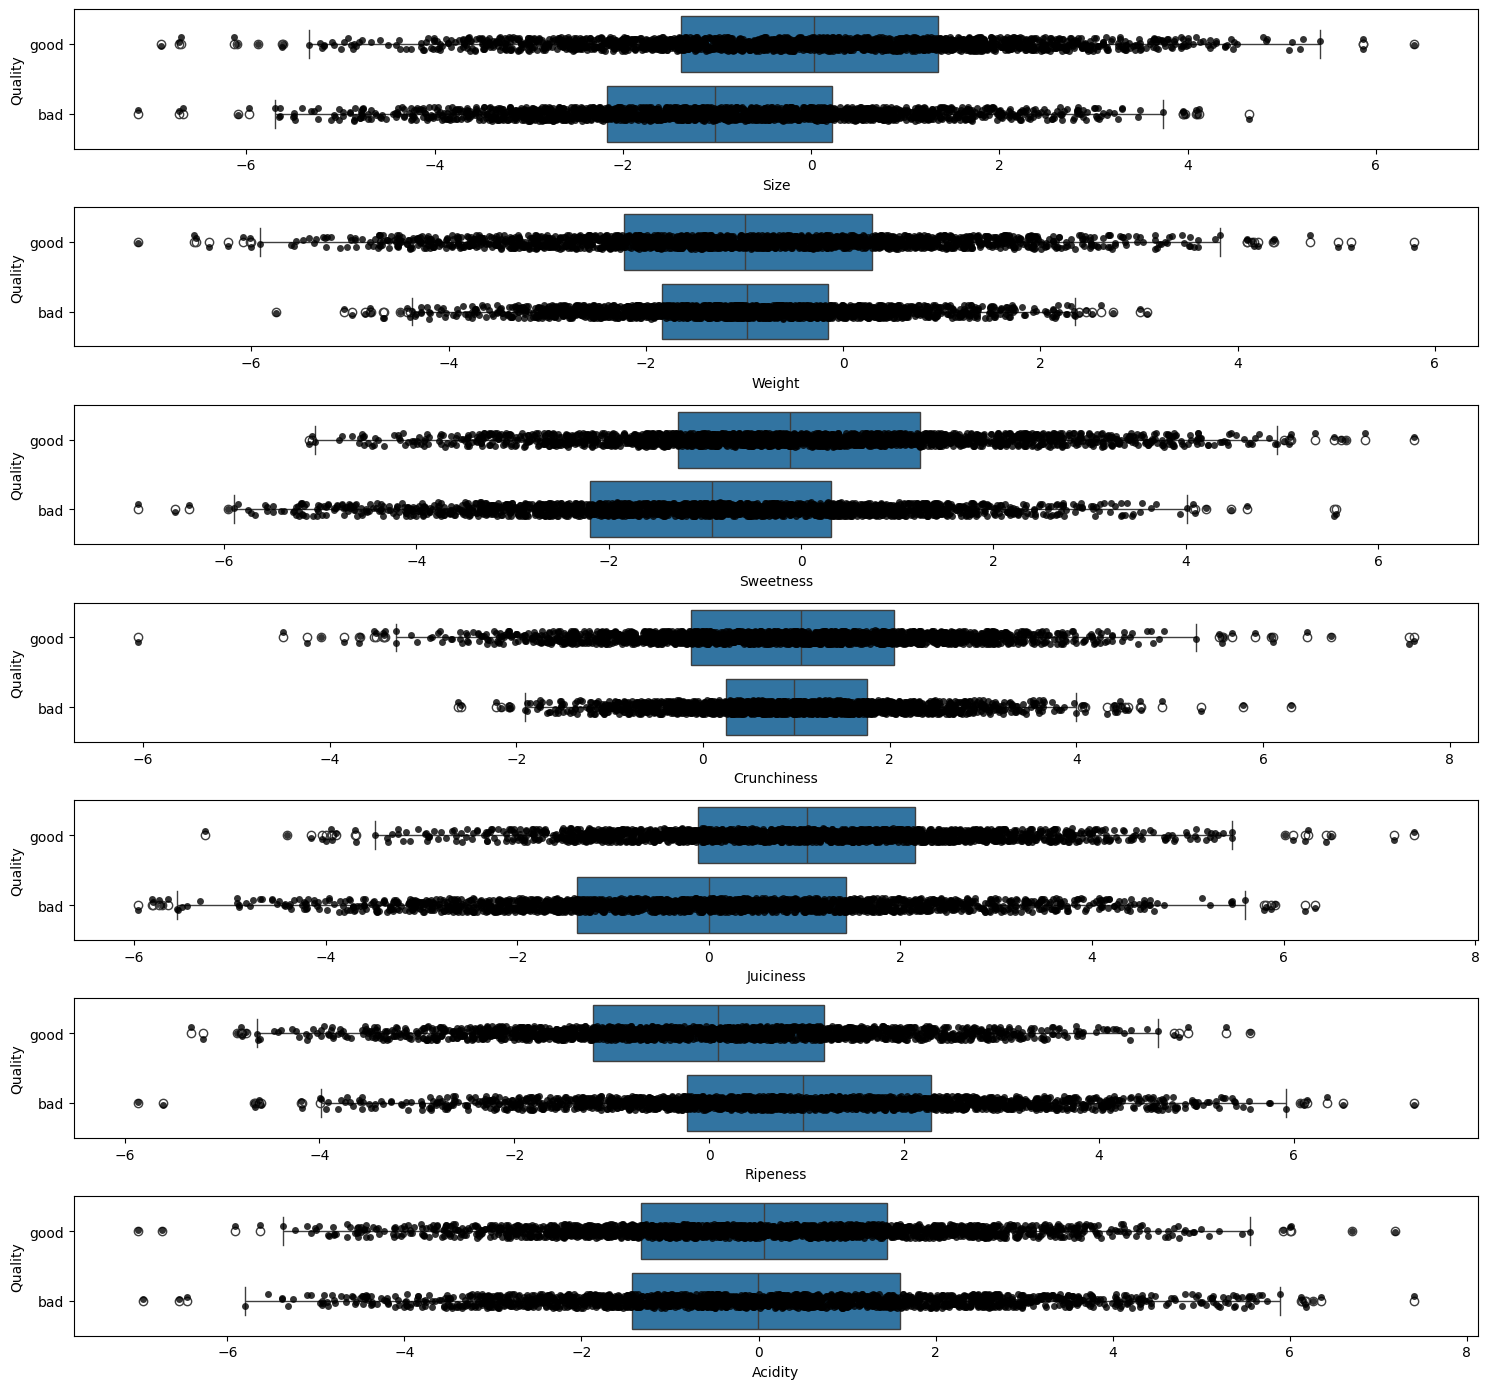

In [15]:
row, col = num_cols.shape
fig, axes = plt.subplots(col, 1, figsize=(15,2 * col))

Quas = df['Quality'].unique().tolist()
Quas.reverse()
Quas_colors=["r","b"]
color_dict = dict(zip(Quas, Quas_colors))

for idx, feature in enumerate(num_cols.columns):
#     sns.boxplot(x=df[feature], ax=axes[idx])

    ax= sns.boxplot(data=df, x=feature, y="Quality", ax=axes[idx])
#     for i in range(0, len(Quas)):
#         mybox = ax.artists[i]
#         mybox.set_facecolor(color_dict[Quas[i]])
    ax = sns.stripplot(data=df, x=feature, y="Quality",
                      jitter=True, marker='o',
                      alpha=0.8, 
                      color="black", ax=axes[idx])
    
#     for Qua in df['Quality'].unique():
#         I = df['Quality'] == Qua
#         sns.boxplot(x=df[feature][I], color='r' if Qua == 'good' else 'b', ax=axes[idx])
   
        
# plt.legend()    
plt.tight_layout()
plt.show()

In [16]:
for idx, feature in enumerate(num_cols.columns):
    fig = px.box(df, y="Quality", x=feature, color="Quality")
    fig.show()
fig.write_html('Box_plot.html')

Далее пронаблюдаем связи между численными признаками за счет построения scatter_plot для всевозможных пар признаков с разделением по признаку Quality за счет цвета. Данная визуализация наглядно показывает наличие\отсутствие корреяций между признаками и калстаризаций результатов по признаку.

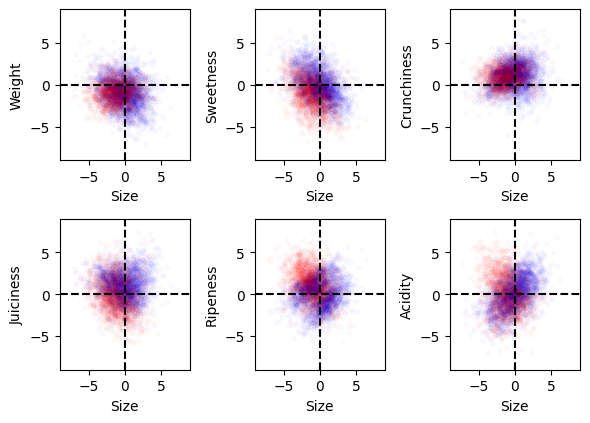

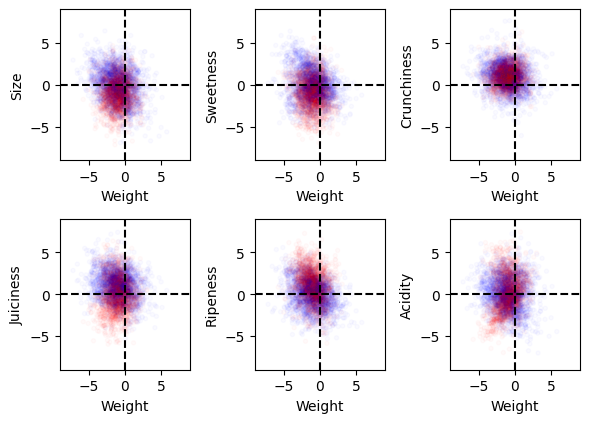

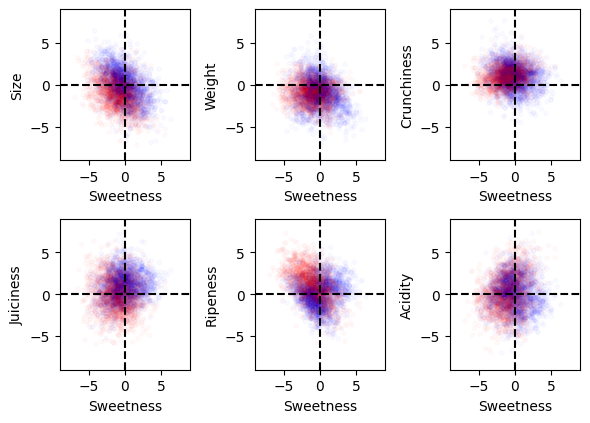

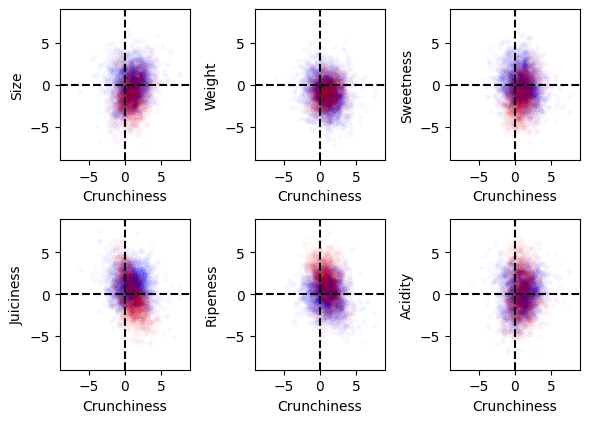

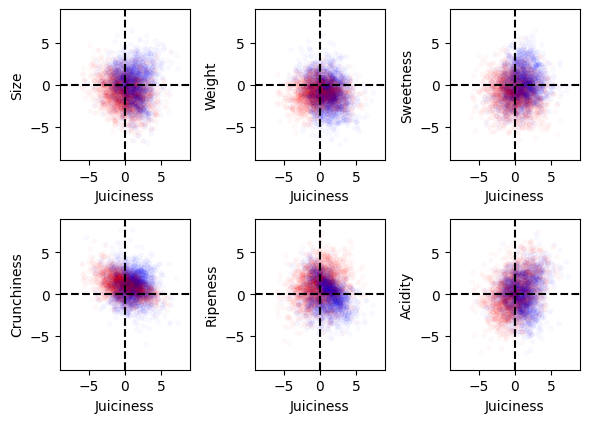

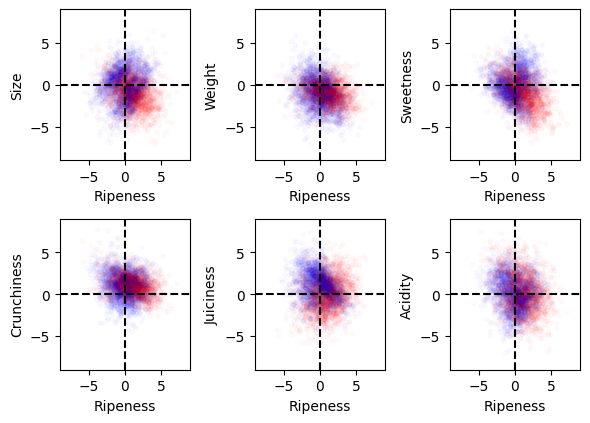

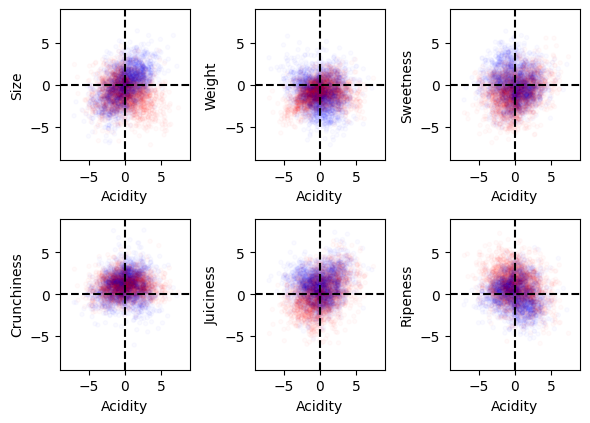

In [17]:
for idxX, featureX in enumerate(num_cols.columns):
    fig = plt.figure(figsize=(6, 6))
    count = 0
    for idx, feature in enumerate(num_cols.columns):
        if featureX == feature: continue
            
        x_data = featureX
        y_data = feature

        def draw_axes():
            plt.xlabel(x_data)
            plt.ylabel(y_data)
            plt.axhline(0.0, color='k', linestyle='--')
            plt.axvline(0.0, color='k', linestyle='--')
            plt.xlim(-9, 9)
            plt.ylim(-9, 9)



        colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

        unique = df['Quality'].unique()
        df_clr = df['Quality'].replace(to_replace=unique, value=colors[:len(unique)])
        ax = fig.add_subplot(331+count)
        draw_axes()
        ax.scatter(df[x_data], df[y_data], marker='.', c=df_clr, cmap='viridis', alpha=0.02)
        
        
        count += 1
    #     I = df['Quality'] == 'good'
    #     fig.add_subplot(132).scatter(df[x_data][I], df[y_data][I], marker='.', c='b', cmap='viridis', alpha=0.05)
    #     draw_axes()

    #     I = df['Quality'] == 'bad'
    #     fig.add_subplot(133).scatter(df[x_data][I], df[y_data][I], marker='.', c='r', cmap='viridis', alpha=0.05)
    #     draw_axes()


    plt.tight_layout()

    plt.show()



Для численного набллюдения корреляций выполнен следующий участок кода, где видно, что в большинстве своем признаки не умеют между собой корреляции (самое максимальное значение по модулю 0.325 из всех возможных комбинаций).

In [18]:
corrs = num_cols.corr()
upper_tri = corrs.where(np.tril(np.ones(corrs.shape), k=-1).astype(np.bool))

fig = px.imshow(upper_tri, color_continuous_scale='RdYlBu_r')
fig.show()

fig.write_html('Corr_plot.html')

plt.figure(figsize=(5,4))
sns.heatmap(upper_tri, cmap="RdYlBu_r");

AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

[Вернуться в начало](#content)
<a id='task_1_3'></a>
# Задание 1.3

**Построить и оценить качество бейзлайна**

Комментарий: В рамках данного пункта необходимо выбрать и обучить бейзлайн-модель, а также измерить ее качество.

Критерии оценки:

- Произведено измерение качества константного предсказания (например, наиболее частотный класс для классификации, среднее/медиана для регрессии) - 3 балла <font color='green'>(status)</font>.
- Бейзлайновая модель обучена на тренировочной выборке, учтены особенности предобработки данных для модели, если они есть - 5 балла <font color='green'>(status)</font>.
- Произведено измерение качества на отложенной выборке с использованием ранее выбранной метрики - 2 балла <font color='green'>(status)</font>.
- Продемонстрировать использование библиотеки plotly для визуализации <font color='green'>(status)</font>.


In [19]:
# feature_cols = ['Size', 'Weight']
X = df.drop('Quality', axis=1) # dataset
y = df['Quality'].replace(to_replace=['good', 'bad'], value=[1, 0]) # target
# X = df[['Size', 'Sweetness']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
dummy_clf = DummyClassifier(strategy="most_frequent") 
dummy_clf.fit(X_train, y_train);
y_pred_dummy = dummy_clf.predict(X_test)

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train);
y_pred_log_reg = log_reg.predict(X_test)

In [22]:
knn = KNeighborsClassifier(n_neighbors=500)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test) 

In [23]:
# plt.figure(figsize=(10, 6))
# plt.scatter(X['Sweetness'][y == 0], X['Size'][y == 0], color='b', label='0', alpha=0.05)
# plt.scatter(X['Sweetness'][y == 1], X['Size'][y == 1], color='r', label='1', alpha=0.05)
# plt.legend()
# x1_min, x1_max = X['Sweetness'].min(), X['Sweetness'].max(),
# x2_min, x2_max = X['Size'].min(), X['Size'].max(),
# xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
# grid = np.c_[xx1.ravel(), xx2.ravel()]
# probs = knn.predict(grid).reshape(xx1.shape)
# plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='green');

# Метрика: confusion_matrix

In [24]:
# Воспользуемся функцией построения матрицы ошибок из документации sklearn

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[  0 506]
 [  0 494]]
Confusion matrix, without normalization
[[360 146]
 [127 367]]
Confusion matrix, without normalization
[[423  83]
 [131 363]]


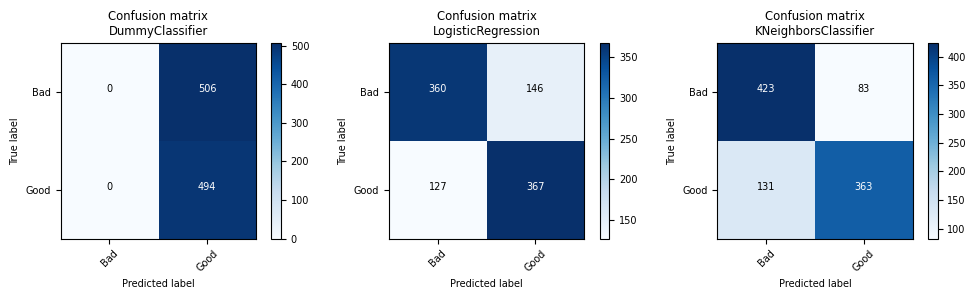

In [25]:
font = {'size' : 7}

plt.rc('font', **font)


plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
cnf_matrix = confusion_matrix(y_test, y_pred_dummy)
plot_confusion_matrix(cnf_matrix, classes=['Bad', 'Good'], title='Confusion matrix\nDummyClassifier')

plt.subplot(1, 3, 2)
cnf_matrix = confusion_matrix(y_test, y_pred_log_reg)
plot_confusion_matrix(cnf_matrix, classes=['Bad', 'Good'], title='Confusion matrix\nLogisticRegression')

plt.subplot(1, 3, 3)
cnf_matrix = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cnf_matrix, classes=['Bad', 'Good'], title='Confusion matrix\nKNeighborsClassifier')

plt.tight_layout()
plt.show()

# Метрика: Accuracy, Recall, Precision, F1 

In [26]:
def qwerty(model, name):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, model.predict(X_test), target_names=['Bad', 'Good'])
    print(name)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print(report)

In [27]:
qwerty(log_reg, '\n---LogisticRegression---\n')
qwerty(dummy_clf, '\n---DummyClassifier---\n')
qwerty(knn, '\n---KNeighborsClassifier---\n')


---LogisticRegression---

Accuracy:  0.727
              precision    recall  f1-score   support

         Bad       0.74      0.71      0.73       506
        Good       0.72      0.74      0.73       494

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000


---DummyClassifier---

Accuracy:  0.494
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00       506
        Good       0.49      1.00      0.66       494

    accuracy                           0.49      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.24      0.49      0.33      1000


---KNeighborsClassifier---

Accuracy:  0.786
              precision    recall  f1-score   support

         Bad       0.76      0.84      0.80       506
        Good       0.81      0.73      0.77       494

    accuracy                           0.79      10

# Average Precision

In [ ]:
fig = go.Figure()

y_pred = log_reg.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

no_skill = len(y_test[y_test == 1]) / len(y_test)

fig.add_shape(showlegend=True,
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=no_skill, y1=no_skill, name = 'No Skills'
)

name = f'Logistic'
fig.add_trace(go.Scatter(x=recall, y=precision, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='Recall',
    yaxis_title='Precision',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500
)
fig.show()

fig.write_html('Precision_recall_plot.html')



plt.figure(figsize=(5, 4))

plt.plot(recall, precision, label=f'Logistic')
plt.plot([0, 1], [no_skill, no_skill], '--k', label=f'No Skills')

plt.legend()
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# AUC ROC

In [ ]:
fig = go.Figure()
fig.add_shape(showlegend=True,
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1, name = 'No Skills'
)

y_pred = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

name = f'Logistic regression: ROC Curve (AUC={auc(fpr, tpr):.4f})'
fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))


y_pred = dummy_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

name = f'Dummy: ROC Curve (AUC={auc(fpr, tpr):.4f})'
fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500
)
fig.show()

fig.write_html('AUC_plot.html')


plt.figure(figsize=(5, 4))

y_pred = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, 'b', label=f'Logistic regression: ROC Curve (AUC={auc(fpr, tpr):.4f})')


y_pred = dummy_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, 'r', label=f'Dummy: ROC Curve (AUC={auc(fpr, tpr):.4f})')


plt.plot([0, 1], [0, 1], '--k', label=f'No Skills')

plt.legend()
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<a id='draft'></a>
[Вернуться в начало](#content)
# Черновики

В предложенной базе данных приведена таблица с метрическими характеристиками яблок и соответствующие им качественный параметр (хоршое-нехорошее). Стоит отметить, что из 7-ми приведенных метрических параметра, соответствующих каждому яблоку, только 2-а (вес и размер) могут пыть определены без нарушения целостности яблока. Суть обучения машины, по выбранным и удобным параметрам определять качество яблока, чтобы из склада на прилавки магазина поступали преимущественно хорошоие яблоки (от 95%), но не тратить на тестирование много ресурсов и времени. Таким образом вес и размер могут стать хорошим выбором, потому что при взвешивании яблока и измерении его размеров не происходит порча фрукта и оно может быть отправлено на продажу с вероятностью более 95%, что оно хорошего качества.